# Astronomical Spectroscopy

To generate publication images change Matplotlib backend to nbagg:

    %matplotlib nbagg

## Blackbody Radiation

A blackbody is a hypothetical object which is a perfect
absorber and emitter of radiation over all wavelengths.
The spectral flux distribution of blackbody's thermal
energy depends on its temperature.
Stars are often modelled as blackbodies in astronomy.
Their spectrum approximates the blackbody spectrum.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import astropy.analytic_functions
import astropy.io.fits
import matplotlib.pyplot as plt

In [3]:
wavelens = np.linspace(100, 30000, num=1000)
temperature = np.array([5000, 4000, 3000]).reshape(3, 1)
with np.errstate(all='ignore'):
    flux_lam = astropy.analytic_functions.blackbody_lambda(
        wavelens,
        temperature
    )

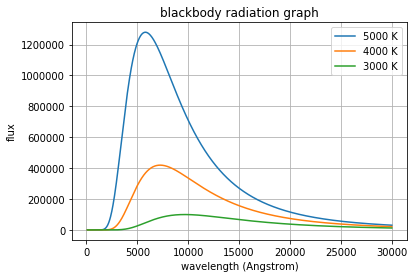

In [4]:
for flux, temp in zip(flux_lam, temperature.ravel()):
    plt.plot(wavelens, flux, label='{} K'.format(temp))
plt.legend()
plt.xlabel('wavelength (Angstrom)')
plt.ylabel('flux')
plt.title('blackbody radiation graph')
plt.grid()

## Spectral Lines

Spectral lines can be used to identify the chemical
composition of stars. If a light from a star is separeted
with a prism its spectrum of colours is crossed with
discrete lines. This can be also visualized as flux
of particural wavelengths. **Flux** is the total amount of
energy that crosses a unit area per unit time.

There are two types of spectral lines:

* emission and
* absorption lines.

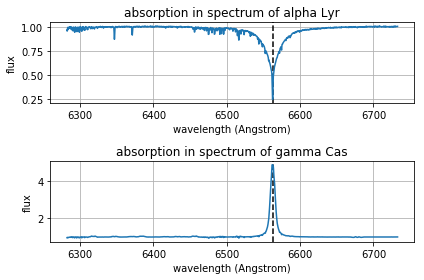

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1)

for ax in (ax1, ax2):
    ax.set_xlabel('wavelength (Angstrom)')
    ax.set_ylabel('flux')
    ax.axvline(x=6562.8, color='black', label='H-alpha', linestyle='dashed')
    ax.grid()

with astropy.io.fits.open('data/alpha-lyr-absorption.fits') as hdulist:
    data = hdulist[1].data
    ax1.plot(
        data.field('spectral'),
        data.field('flux')
    )
    ax1.set_title('absorption in spectrum of {}'.format(hdulist[1].header['OBJECT']))

with astropy.io.fits.open('ssap/uk220017.fits') as hdulist:
    data = hdulist[1].data
    ax2.plot(
        data.field('spectral'),
        data.field('flux')
    )
    ax2.set_title('absorption in spectrum of {}'.format(hdulist[1].header['OBJECT']))

fig.tight_layout()

## Continuum Normalization

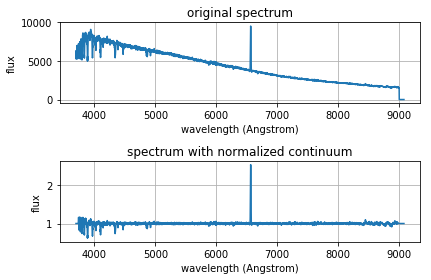

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1)

for ax in (ax1, ax2):
    ax.set_xlabel('wavelength (Angstrom)')
    ax.set_ylabel('flux')
    ax.grid()

with astropy.io.fits.open('data/bt-cmi-lamost.fits') as hdulist:
    header = hdulist[0].header
    start = header['CRVAL1']
    delta = header['CD1_1']
    pix = header['CRPIX1']
    waves = np.array([10 ** (start + (i - pix + 1) * delta) for i in range(header['NAXIS1'])])
    
    ax1.plot(waves, hdulist[0].data[0])
    ax1.set_title('original spectrum')
    
    ax2.plot(waves, hdulist[0].data[2])
    ax2.set_title('spectrum with normalized continuum')
    
fig.tight_layout()

## LAMOST versus Ondřejov

Cross matched spectum of BT CMi.

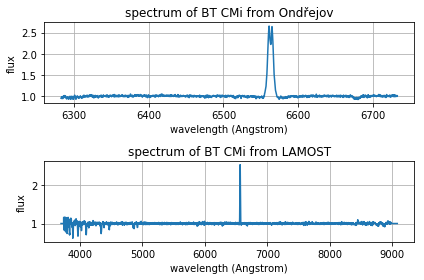

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1)

for ax in (ax1, ax2):
    ax.set_xlabel('wavelength (Angstrom)')
    ax.set_ylabel('flux')
    ax.grid()
    
with astropy.io.fits.open('data/bt-cmi-ondrejov.fits') as hdulist:
    header = hdulist[1].header
    data = hdulist[1].data
    ax1.plot(data.field('spectral'), data.field('flux'))
    ax1.set_title('spectrum of {} from Ondřejov'.format(header['OBJECT']))

with astropy.io.fits.open('data/bt-cmi-lamost.fits') as hdulist:
    # waves from previous code cell
    ax2.plot(waves, hdulist[0].data[2])
    ax2.set_title('spectrum of BT CMi from LAMOST')
    
fig.tight_layout()